In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [2]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r'C:\Users\NAS\Desktop\spectrograms',
  color_mode='grayscale', ## Rgb to Grayscale
  label_mode='categorical',
  validation_split=0.2,
  subset="training",
  seed=55,
  image_size=(128, 128), ## Resize 0.3
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r'C:\Users\NAS\Desktop\spectrograms',
  color_mode='grayscale',
  label_mode='categorical',
  validation_split=0.2,
  subset="validation",
  seed=55,
  image_size=(128, 128),
  batch_size=batch_size)

test_dataset = val_ds.take(15)
val_ds = val_ds.skip(15)

print(' ')
print('Batches for training -->', train_ds.cardinality())
print(' ')
print('Batches for validating -->', val_ds.cardinality())
print(' ')
print('Batches for testing -->', test_dataset.cardinality())

Rescale = Sequential([tf.keras.layers.Rescaling(1./255)]) ## Normalization

model = Sequential([
  InputLayer(input_shape=(128,128,1)), ## 390, 270
  Rescale,
  Conv2D(filters=32,kernel_size=(3,3),padding="valid", activation="relu"),
  Conv2D(filters=32,kernel_size=(3,3),padding="valid", activation="relu"),
  MaxPool2D(pool_size=(2,2),strides=(2,2)),
  Conv2D(filters=32, kernel_size=(3,3), padding="valid", activation="relu"),
  Conv2D(filters=32, kernel_size=(3,3), padding="valid", activation="relu"),
  MaxPool2D(pool_size=(2,2),strides=(2,2)),
  Conv2D(filters=16, kernel_size=(3,3), padding="valid", activation="relu"),
  Conv2D(filters=16, kernel_size=(3,3), padding="valid", activation="relu"),
  MaxPool2D(pool_size=(2,2),strides=(2,2)),
  Conv2D(filters=16, kernel_size=(3,3), padding="valid", activation="relu"),
  Conv2D(filters=16, kernel_size=(3,3), padding="valid", activation="relu"),
  MaxPool2D(pool_size=(2,2),strides=(2,2)),
  Flatten(),
  Dense(units=256,activation="relu"),
  Dense(units=128,activation="relu"),
  Dense(units=10, activation="softmax")
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='auto') ## Save best model

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto') ## Epoch and Accuracy Optimization

rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001) ## Learning rate Optimization

hist = model.fit(train_ds, 
                validation_data= val_ds,
                epochs=30,
                callbacks=[checkpoint,early,rlrop])

Found 8732 files belonging to 10 classes.
Using 6986 files for training.
Found 8732 files belonging to 10 classes.
Using 1746 files for validation.
 
Batches for training --> tf.Tensor(219, shape=(), dtype=int64)
 
Batches for validating --> tf.Tensor(40, shape=(), dtype=int64)
 
Batches for testing --> tf.Tensor(15, shape=(), dtype=int64)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 128, 128, 1)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 conv2d_9 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                      

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


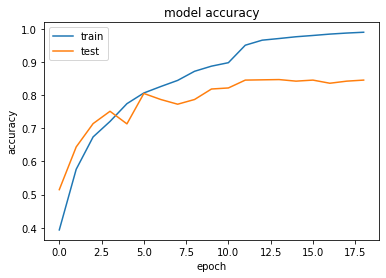

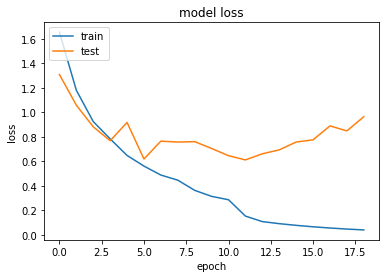

In [3]:
import matplotlib.pyplot as plt

print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
loss, acc = model.evaluate(test_dataset)
print("Accuracy", acc)

15/15 [==============================] - 1s 29ms/step - loss: 0.9273 - accuracy: 0.8479
Accuracy 0.8479166626930237
